In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import csv

In [2]:
# ignorar avisos
import warnings
# Suprimir apenas o SettingWithCopyWarning
warnings.filterwarnings('ignore')

In [3]:
solicitacoes_credito = pd.read_csv('Arquivos/solicitacoescredito.csv')

solicitacoes_credito.head()

,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,...,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista
0,1,James Richardson-Patel,Alexandra Williams,KEBE17609492220843,0,0.252448,0.0,2015-12-10T00:00:00,0,0.00,...,12.0,0.0,2003.0,Acima de 17 anos,90000.0,False,True,1.0,43200.0,2020-02-03T20:57:33
1,2,Dr. Geoffrey Walsh,Mr. Darren Arnold,JRBK88908250677300,0,0.000000,NaN,2019-06-12T17:28:31,0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,3,Joanna Hudson,Dr. David Rees,GCVQ28531614261293,4,0.624777,0.0,2019-11-27T00:00:00,0,0.00,...,7.0,0.0,2014.0,De 6 a 10 anos,20000.0,False,True,1.0,4320.0,2020-02-04T16:40:49
3,4,Gordon Jones-Hopkins,Sara Reid-Robson,KJND32266018316396,20,0.000000,NaN,2017-02-13T17:20:27,0,0.00,...,12.0,0.0,2013.0,De 6 a 10 anos,30000.0,False,True,0.0,5920.0,2020-02-04T16:37:52
4,5,Nigel Lee,Dr. Stanley Duncan,CGQN15826802440348,20,0.454088,0.0,2010-07-13T00:00:00,20,1486.95,...,9.0,40680051.0,2002.0,Acima de 17 anos,75000.0,False,False,1.0,89000.0,2020-02-04T15:06:28


In [53]:
# solicitacoes = solicitacoes_credito[['razaoSocial', 'nomeFantasia', 'cnpjSemTraco', 'margemBrutaAcumulada', 'maiorAtraso','percentualProtestos','primeiraCompra','prazoMedioRecebimentoVendas','titulosEmAberto','valorSolicitado','valorAprovado','dataAprovadoEmComite','ativoCirculante','passivoCirculante','totalAtivo','totalPatrimonioLiquido','endividamento','faturamentoBruto','margemBruta','custos','anoFundacao','intervaloFundacao','capitalSocial','restricoes','scorePontualidade','limiteEmpresaAnaliseCredito'
# ]]

clientes = solicitacoes_credito[['cnpjSemTraco','faturamentoBruto', 'intervaloFundacao', 'empresa_MeEppMei', 'endividamento', 'maiorAtraso', 'restricoes','scorePontualidade']]


In [54]:
clientes1 = clientes.drop_duplicates()

display(clientes1)

,cnpjSemTraco,faturamentoBruto,intervaloFundacao,empresa_MeEppMei,endividamento,maiorAtraso,restricoes,scorePontualidade
0,KEBE17609492220843,1766880.0,Acima de 17 anos,True,NaN,0,False,1.000000
1,JRBK88908250677300,NaN,NaN,NaN,NaN,0,NaN,0.000000
2,GCVQ28531614261293,2814940.0,De 6 a 10 anos,True,NaN,4,False,1.000000
3,KJND32266018316396,1285274.0,De 6 a 10 anos,True,NaN,20,False,0.000000
4,CGQN15826802440348,40779757.0,Acima de 17 anos,False,3039112.0,20,False,1.000000
...,...,...,...,...,...,...,...,...
8964,ZSXK54917208221164,NaN,NaN,NaN,NaN,2,NaN,1.000000
8966,HSZH55177567038605,NaN,NaN,NaN,NaN,0,NaN,1.000000
8968,YKGZ02907098931653,NaN,NaN,NaN,NaN,149,NaN,0.990876
8969,UCBM91111020900951,NaN,NaN,NaN,NaN,23,NaN,0.958869


In [55]:
# apagando clientes com faturamento nulo
clientes2 = clientes1.dropna(subset=['faturamentoBruto'])
clientes2.head()
clientes2

,cnpjSemTraco,faturamentoBruto,intervaloFundacao,empresa_MeEppMei,endividamento,maiorAtraso,restricoes,scorePontualidade
0,KEBE17609492220843,1766880.0,Acima de 17 anos,True,NaN,0,False,1.000000
2,GCVQ28531614261293,2814940.0,De 6 a 10 anos,True,NaN,4,False,1.000000
3,KJND32266018316396,1285274.0,De 6 a 10 anos,True,NaN,20,False,0.000000
4,CGQN15826802440348,40779757.0,Acima de 17 anos,False,3039112.0,20,False,1.000000
5,KAYS53232027306925,918476.0,De 6 a 10 anos,True,NaN,0,False,0.000000
...,...,...,...,...,...,...,...,...
8956,KBOS63147302240824,3410070.0,De 6 a 10 anos,False,NaN,18,False,0.000000
8957,ISPY81393760117061,1366363.0,De 0 a 5 anos,True,0.0,4,False,1.000000
8958,XIIJ66670040144884,133280394.0,De 11 a 16 anos,False,74793.0,4,False,0.999005
8959,JXCH36268697453955,4887005.0,De 11 a 16 anos,False,1257000.0,18,False,0.830644


In [56]:
# clientes3 = clientes1[clientes1['faturamentoBruto'] <= 1]
clientes3 = clientes2
clientes3.head()
# clientes3


,cnpjSemTraco,faturamentoBruto,intervaloFundacao,empresa_MeEppMei,endividamento,maiorAtraso,restricoes,scorePontualidade
0,KEBE17609492220843,1766880.0,Acima de 17 anos,True,NaN,0,False,1.0
2,GCVQ28531614261293,2814940.0,De 6 a 10 anos,True,NaN,4,False,1.0
3,KJND32266018316396,1285274.0,De 6 a 10 anos,True,NaN,20,False,0.0
4,CGQN15826802440348,40779757.0,Acima de 17 anos,False,3039112.0,20,False,1.0
5,KAYS53232027306925,918476.0,De 6 a 10 anos,True,NaN,0,False,0.0


In [57]:
clientes3.endividamento.value_counts(dropna=False)

# filtra quando nulos, similar a select * from clientes3 where endividamento isnull
clientesNAN = clientes3.loc[clientes3.faturamentoBruto.isnull()]
clientesNAN

,cnpjSemTraco,faturamentoBruto,intervaloFundacao,empresa_MeEppMei,endividamento,maiorAtraso,restricoes,scorePontualidade


In [60]:
# Filtra os clientes com scorePontualidade igual a 1
teste_clientes2 = clientes3.loc[clientes3['scorePontualidade'] == 1]

# Encontra o cliente com a menor quantidade de dias de atraso
cliente_min_atraso = teste_clientes2.loc[teste_clientes2['maiorAtraso'].idxmin()]

# Encontra o cliente com a maior quantidade de dias de atraso
cliente_max_atraso = teste_clientes2.loc[teste_clientes2['maiorAtraso'].idxmax()]

# Exibe os resultados
print("Cliente com menor atraso:")
display(cliente_min_atraso[['cnpjSemTraco','maiorAtraso', 'scorePontualidade']])

print("\nCliente com maior atraso:")
print(cliente_max_atraso[['cnpjSemTraco','maiorAtraso', 'scorePontualidade']])


Cliente com menor atraso:


cnpjSemTraco         KEBE17609492220843
maiorAtraso                           0
scorePontualidade                   1.0
Name: 0, dtype: object


Cliente com maior atraso:
cnpjSemTraco         SJWK90115301924947
maiorAtraso                         977
scorePontualidade                   1.0
Name: 1102, dtype: object


In [9]:
# clientes3.endividamento = clientes3.endividamento.fillna(0)
clientes3.loc[pd.isnull(clientes3.endividamento), 'endividamento'] = 0  
# clientes3['anoFundacao'] = clientes3['anoFundacao'].astype(int)

display(clientes3)

,faturamentoBruto,intervaloFundacao,empresa_MeEppMei,endividamento,maiorAtraso,restricoes
0,1766880.0,Acima de 17 anos,True,0.0,0,False
2,2814940.0,De 6 a 10 anos,True,0.0,4,False
3,1285274.0,De 6 a 10 anos,True,0.0,20,False
4,40779757.0,Acima de 17 anos,False,3039112.0,20,False
5,918476.0,De 6 a 10 anos,True,0.0,0,False
...,...,...,...,...,...,...
8956,3410070.0,De 6 a 10 anos,False,0.0,18,False
8957,1366363.0,De 0 a 5 anos,True,0.0,4,False
8958,133280394.0,De 11 a 16 anos,False,74793.0,4,False
8959,4887005.0,De 11 a 16 anos,False,1257000.0,18,False


A partir daqui começa a Clusterização

Referencia: https://www.youtube.com/watch?v=GBSTT5NBE4g

In [10]:
# Trazendo percentual de pontuação 
# clientes3.scorePontualidade.value_counts() / clientes3.shape[0]

# Trazendo os clintes com score abaixo de 1 
# clientes3[clientes3['scorePontualidade'] < 1]['scorePontualidade'].value_counts()

# Traz quantos valores estão nulos
# clientes3.scorePontualidade.value_counts(dropna=False)



In [11]:
# transformar todos os dados não numericos em numericos fazendo que as linhas virem colunas
clientes_dummies = pd.get_dummies(clientes3)
clientes_dummies.head()

,faturamentoBruto,endividamento,maiorAtraso,intervaloFundacao_Acima de 17 anos,intervaloFundacao_De 0 a 5 anos,intervaloFundacao_De 11 a 16 anos,intervaloFundacao_De 6 a 10 anos,empresa_MeEppMei_False,empresa_MeEppMei_True,restricoes_False,restricoes_True
0,1766880.0,0.0,0,True,False,False,False,False,True,True,False
2,2814940.0,0.0,4,False,False,False,True,False,True,True,False
3,1285274.0,0.0,20,False,False,False,True,False,True,True,False
4,40779757.0,3039112.0,20,True,False,False,False,True,False,True,False
5,918476.0,0.0,0,False,False,False,True,False,True,True,False


In [12]:
# Ele soma todos os que são 1 ou true 
clientes_dummies.sum(axis=1)

0         1766883.0
2         2814947.0
3         1285297.0
4        43818892.0
5          918479.0
           ...     
8956      3410091.0
8957      1366370.0
8958    133355194.0
8959      6144026.0
8960      5392169.0
Length: 5343, dtype: object

In [13]:
# Dividindo todas as linhas pela soma delas 
X = clientes_dummies.div(clientes_dummies.sum(axis=1), axis='rows')
# X = clientes_dummies.sum(axis=1)
X.head()

,faturamentoBruto,endividamento,maiorAtraso,intervaloFundacao_Acima de 17 anos,intervaloFundacao_De 0 a 5 anos,intervaloFundacao_De 11 a 16 anos,intervaloFundacao_De 6 a 10 anos,empresa_MeEppMei_False,empresa_MeEppMei_True,restricoes_False,restricoes_True
0,0.999998,0.0,0.0,0.000001,0.0,0.0,0.0,0.0,0.000001,0.000001,0.0
2,0.999998,0.0,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.999982,0.0,0.000016,0.0,0.0,0.0,0.000001,0.0,0.000001,0.000001,0.0
4,0.930643,0.069356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.999997,0.0,0.0,0.0,0.0,0.0,0.000001,0.0,0.000001,0.000001,0.0


In [14]:
# Agrupamento

km = KMeans(n_clusters=8)
km.fit_predict(X)

array([2, 2, 2, ..., 2, 0, 2])

In [15]:
# Descobrindo qual o melhor numero de clusters(cotovelo)
distorcions = []
n_clusters = range(2, 15)
for n_cluster2 in n_clusters:
    print(n_cluster2)
    distorcions.append(KMeans(n_clusters=n_cluster2, max_iter=10_000, n_init=100, random_state=61658).fit(X).inertia_)

2
3
4
5
6
7
8
9
10
11
12
13
14


In [16]:
distorcions

[126.43447764913483,
 62.44357872511917,
 37.78556590893707,
 25.39582059814543,
 18.199510167153388,
 14.563879931250355,
 11.037665454745813,
 9.882723349079072,
 8.733787748196557,
 7.992478761442557,
 7.267743215198607,
 6.75557261256562,
 6.294976779698623]

<function matplotlib.pyplot.grid(visible: 'bool | None' = None, which: "Literal['major', 'minor', 'both']" = 'major', axis: "Literal['both', 'x', 'y']" = 'both', **kwargs) -> 'None'>

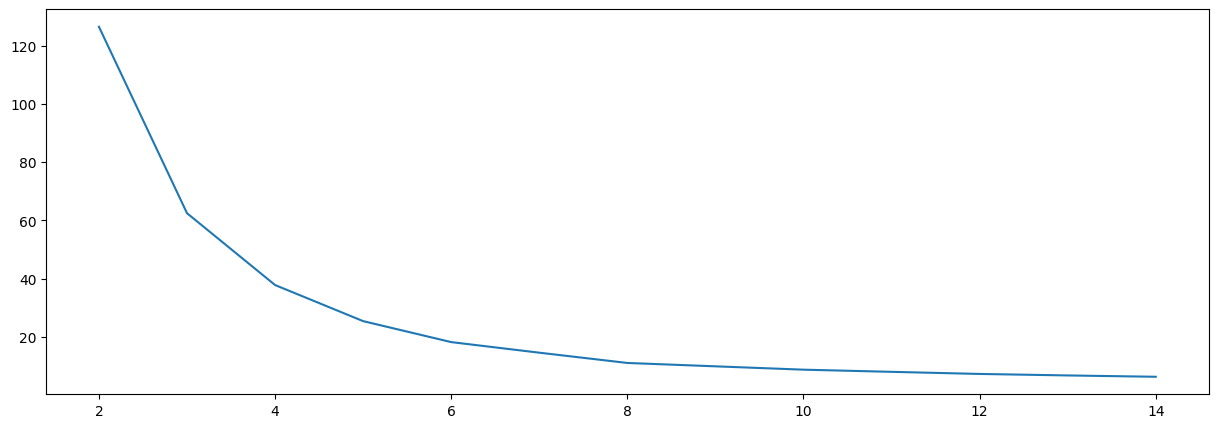

In [17]:
plt.figure(figsize=(15,5))
plt.plot(n_clusters, distorcions)
plt.grid
# Aqui, consideramos o ultimo "cotovelo" que no caso é o 4

In [18]:
# clusterização com o numero correto
km = KMeans(n_clusters=4, max_iter=10_000, n_init=100, random_state=61658)
X_t = km.fit_predict(X)
X_t

array([1, 1, 1, ..., 1, 3, 1])

In [19]:
clientes4 = clientes3
clientes4.loc[:, 'cluster'] = X_t
clientes4


,faturamentoBruto,intervaloFundacao,empresa_MeEppMei,endividamento,maiorAtraso,restricoes,cluster
0,1766880.0,Acima de 17 anos,True,0.0,0,False,1
2,2814940.0,De 6 a 10 anos,True,0.0,4,False,1
3,1285274.0,De 6 a 10 anos,True,0.0,20,False,1
4,40779757.0,Acima de 17 anos,False,3039112.0,20,False,1
5,918476.0,De 6 a 10 anos,True,0.0,0,False,1
...,...,...,...,...,...,...,...
8956,3410070.0,De 6 a 10 anos,False,0.0,18,False,1
8957,1366363.0,De 0 a 5 anos,True,0.0,4,False,1
8958,133280394.0,De 11 a 16 anos,False,74793.0,4,False,1
8959,4887005.0,De 11 a 16 anos,False,1257000.0,18,False,3


In [20]:
# filtrar clientes com cluster =1
clientes4.loc[clientes4.cluster==1]


,faturamentoBruto,intervaloFundacao,empresa_MeEppMei,endividamento,maiorAtraso,restricoes,cluster
0,1766880.0,Acima de 17 anos,True,0.0,0,False,1
2,2814940.0,De 6 a 10 anos,True,0.0,4,False,1
3,1285274.0,De 6 a 10 anos,True,0.0,20,False,1
4,40779757.0,Acima de 17 anos,False,3039112.0,20,False,1
5,918476.0,De 6 a 10 anos,True,0.0,0,False,1
...,...,...,...,...,...,...,...
8953,2352101.0,Acima de 17 anos,False,0.0,3,False,1
8956,3410070.0,De 6 a 10 anos,False,0.0,18,False,1
8957,1366363.0,De 0 a 5 anos,True,0.0,4,False,1
8958,133280394.0,De 11 a 16 anos,False,74793.0,4,False,1


In [21]:
clientes_dummies.loc[:, 'cluster'] = X_t
clientes_dummies.head()


,faturamentoBruto,endividamento,maiorAtraso,intervaloFundacao_Acima de 17 anos,intervaloFundacao_De 0 a 5 anos,intervaloFundacao_De 11 a 16 anos,intervaloFundacao_De 6 a 10 anos,empresa_MeEppMei_False,empresa_MeEppMei_True,restricoes_False,restricoes_True,cluster
0,1766880.0,0.0,0,True,False,False,False,False,True,True,False,1
2,2814940.0,0.0,4,False,False,False,True,False,True,True,False,1
3,1285274.0,0.0,20,False,False,False,True,False,True,True,False,1
4,40779757.0,3039112.0,20,True,False,False,False,True,False,True,False,1
5,918476.0,0.0,0,False,False,False,True,False,True,True,False,1


In [22]:
# # separa clientes por cluster 
# saida = []

# # separa clientes por cluster 
# for col in clientes4.drop('clus', axis=1).columns:
#     for cl in np.sort(clientes4.clus.unique()):
#         if clientes4.dtypes[col] == object:
#             # vc = 100*clientes4.loc[clientes4.clus==cl,col].value_counts() / (clientes4.clus==cl).sum()
#             vc = clientes4.loc[clientes4.clus==cl,col].value_counts() / (clientes4.clus==cl).sum()
#             for cat,cnt in vc.reset_index().values:
#                 # print(f'{cl:d};{col};{str(cat):s};{cnt:5.2f}%'.replace(',', '.'))
#                 print(f'{cl:d};{col};{str(cat):s};{cnt:5.2f}'.replace(',', '.'))
#                 saida.append([cl, col, str(cat), f'{cnt:5.2f}'])
#         else:
#             # print(f'{cl:d};{col};{clientes4.loc[clientes4.clus==cl,col].mean():.2f}%'.replace(',', '.'))
#             print(f'{cl:d};{col};{clientes4.loc[clientes4.clus==cl,col].mean():.2f}'.replace(',', '.'))
#             saida.append([cl, col, str(cat), f'{cnt:5.2f}'])

# for col in clientes4.drop('clus', axis=1).columns:
#     if clientes4.dtypes[col] == object:
#         # vc = 100*clientes4.loc[:,col].value_counts() / (clientes4.shape[0])
#         vc = clientes4.loc[:,col].value_counts() / (clientes4.shape[0])
#         for cat,cnt in vc.reset_index().values:
#             # print(f'All;{col};{str(cat):s};{cnt:5.2f}%'.replace(',', '.')) 
#             print(f'All;{col};{str(cat):s};{cnt:5.2f}'.replace(',', '.')) 
#             saida.append([cl, col, str(cat), f'{cnt:5.2f}'])
#     else:
#         # print(f'All;{col};{clientes4.loc[:,col].mean():.2f}%'.replace(',', '.'))
#         print(f'All;{col};{clientes4.loc[:,col].mean():.2f}'.replace(',', '.'))
#         saida.append([cl, col, str(cat), f'{cnt:5.2f}'])


Alguns tratamentos 

In [23]:
clienteFinal = clientes4

In [24]:
# clientes4['dividas'] = clientes4['endividamento'] < 1
clienteFinal.loc[:, 'endividamento_ativo'] = clienteFinal['endividamento'] < 1

# Adiciona uma nova coluna 'condicao' que será True se 'endividamento' for maior que 'faturamento', caso contrário False
# clienteFinal['DividaMaiorQFaturamento'] = clienteFinal['endividamento'] > clienteFinal['faturamentoBruto']

clienteFinal.head()

,faturamentoBruto,intervaloFundacao,empresa_MeEppMei,endividamento,maiorAtraso,restricoes,cluster,endividamento_ativo
0,1766880.0,Acima de 17 anos,True,0.0,0,False,1,True
2,2814940.0,De 6 a 10 anos,True,0.0,4,False,1,True
3,1285274.0,De 6 a 10 anos,True,0.0,20,False,1,True
4,40779757.0,Acima de 17 anos,False,3039112.0,20,False,1,False
5,918476.0,De 6 a 10 anos,True,0.0,0,False,1,True


In [25]:
clienteFinal.loc[clienteFinal.endividamento_ativo==False]


,faturamentoBruto,intervaloFundacao,empresa_MeEppMei,endividamento,maiorAtraso,restricoes,cluster,endividamento_ativo
4,40779757.0,Acima de 17 anos,False,3039112.0,20,False,1,False
10,4575646.0,De 6 a 10 anos,True,366465.0,7,False,1,False
11,13871246.0,De 11 a 16 anos,False,1715000.0,26,False,1,False
14,36783195.0,Acima de 17 anos,False,1567918.0,4,False,1,False
15,538430217.0,Acima de 17 anos,True,10499029.0,28,False,1,False
...,...,...,...,...,...,...,...,...
8928,110174190.0,Acima de 17 anos,False,3168629.0,30,True,1,False
8937,71515611.0,Acima de 17 anos,False,13020386.0,53,False,3,False
8947,486876.0,De 6 a 10 anos,False,388235.0,3,False,3,False
8958,133280394.0,De 11 a 16 anos,False,74793.0,4,False,1,False


Analisar com gráficos para entender quais variaveis são importantes

In [28]:
# Salvando em Excel
df_output = pd.DataFrame(clientes4, columns=['Cluster', 'Campo', 'Category/Value', 'Percentage/Mean'])

clienteFinal.to_excel('saida.xlsx', index=False)

In [27]:
# # Salvando em CSV 

# with open('saida.csv', mode='w', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerow(['Cluster', 'Campo', 'Category/Value', 'Percentage/Mean'])
#     writer.writerows(clientes4)

In [29]:
# # Função para substituir valores com base no tipo de dado
# def substituir_valor(valor):
#     if isinstance(valor, str):
#         return '-'  # Substitui por '-' se for string
#     elif isinstance(valor, (int, float)):
#         return 0  # Substitui por 0 se for numérico
#     else:
#         return valor

# # Aplicar a função no DataFrame inteiro
# solicitacoes1 = solicitacoes_distinct.applymap(substituir_valor)

In [32]:
solicitacoes_credito.head()

,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,...,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista
0,1,James Richardson-Patel,Alexandra Williams,KEBE17609492220843,0,0.252448,0.0,2015-12-10T00:00:00,0,0.00,...,12.0,0.0,2003.0,Acima de 17 anos,90000.0,False,True,1.0,43200.0,2020-02-03T20:57:33
1,2,Dr. Geoffrey Walsh,Mr. Darren Arnold,JRBK88908250677300,0,0.000000,NaN,2019-06-12T17:28:31,0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,3,Joanna Hudson,Dr. David Rees,GCVQ28531614261293,4,0.624777,0.0,2019-11-27T00:00:00,0,0.00,...,7.0,0.0,2014.0,De 6 a 10 anos,20000.0,False,True,1.0,4320.0,2020-02-04T16:40:49
3,4,Gordon Jones-Hopkins,Sara Reid-Robson,KJND32266018316396,20,0.000000,NaN,2017-02-13T17:20:27,0,0.00,...,12.0,0.0,2013.0,De 6 a 10 anos,30000.0,False,True,0.0,5920.0,2020-02-04T16:37:52
4,5,Nigel Lee,Dr. Stanley Duncan,CGQN15826802440348,20,0.454088,0.0,2010-07-13T00:00:00,20,1486.95,...,9.0,40680051.0,2002.0,Acima de 17 anos,75000.0,False,False,1.0,89000.0,2020-02-04T15:06:28


In [38]:
teste_clientes = solicitacoes_credito[['scorePontualidade', 'maiorAtraso']].groupby('maiorAtraso').max()
# teste_clientes = solicitacoes_credito[['scorePontualidade', 'maiorAtraso']]
teste_clientes2 = teste_clientes.drop_duplicates()

teste_clientes2=teste_clientes2.loc[teste_clientes2.scorePontualidade==1]

min_maiorAtraso = teste_clientes2.get('maiorAtraso', pd.Series([])).min()
max_maiorAtraso = teste_clientes2.get('maiorAtraso', pd.Series([])).max()


print(max_maiorAtraso, min_maiorAtraso)
teste_clientes.describe()
teste_clientes2

nan nan


,scorePontualidade
maiorAtraso,
0,1.0
